In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import os
import cmasher as cmr

In [2]:
# Directory containing the contrast files
directory = '/home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/calcon/'
rawcon_dir = ""

In [8]:
# A dictionary showing where to find the contrasts for each reduction mode: 
best_dict = {"ADI":{"ann_sub":(20,6),
                    "seps_filename":"ADI+RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_seps.npy",
                    "cons_filename":"ADI+RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_cons.npy",
                    "linestyle":'-'},
             "RDI": {"ann_sub":(20,6),
                     "seps_filename":"RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_seps.npy",
                     "cons_filename":"RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_cons.npy",
                     "linestyle":'-'},
             "ADI+RDI": {"ann_sub":(20,6),
                        "seps_filename":"ADI+RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_seps.npy",
                        "cons_filename":"ADI+RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_cons.npy",
                        "linestyle":'--'},
             }

best_dict = {"ADI":{"ann_sub":(20,6),
                    "seps_filename":"ADI+RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_seps.npy",
                    "cons_filename":"ADI+RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_cons.npy",
                    "linestyle":'-'},
             "RDI": {"ann_sub":(20,6),
                     "seps_filename":"RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_seps.npy",
                     "cons_filename":"RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_cons.npy",
                     "linestyle":'-'},
             "ADI+RDI": {"ann_sub":(20,6),
                        "seps_filename":"ADI+RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_seps.npy",
                        "cons_filename":"ADI+RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_cons.npy",
                        "linestyle":'--'},
             }


In [11]:
#Klip datadir: 
klip_dir = "/home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/"
klip_filename = "ADI+RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits"
kl_index = 3 #This should be 10 KL modes
klip_image = fits.open(os.path.join(klip_dir,klip_filename))[0].data[kl_index]
klip_header = fits.open(os.path.join(klip_dir,klip_filename))[0].header

In [12]:
#Pyklip doesn't have all the header info, so let's grab one: 
f360m_roll1_filename = "/home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/jw01386117001_03107_00001_nrcalong_calints_mstar_subtracted_MCRDI_psf_subtracted.fits"
f360m_roll1_header0 = fits.open(f360m_roll1_filename)[0].header
f360m_roll1_header1 = fits.open(f360m_roll1_filename)[1].header


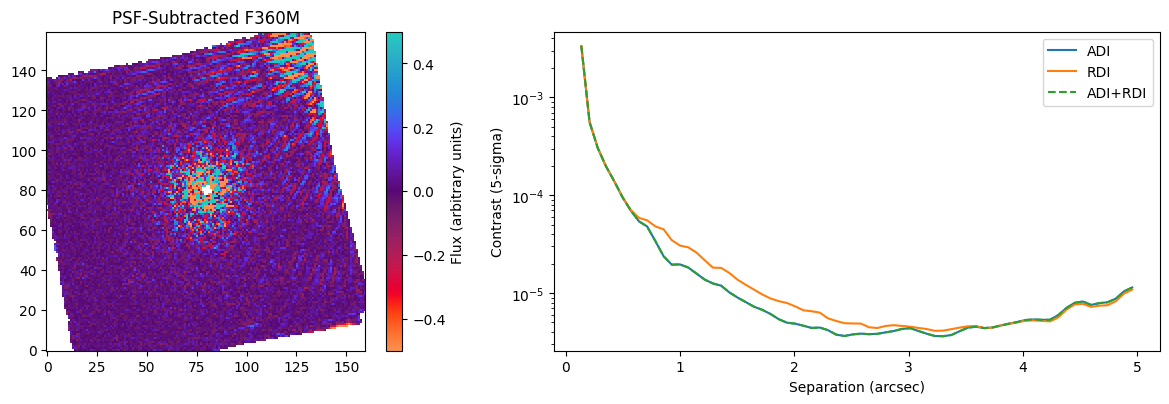

In [13]:
# Create a figure and two subplots with the desired widths
fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1.4, 2]})

#Coronagraphic center: 
coron_center = [173.4-80,149.1-80]

### KLIP Data 
cmap = plt.get_cmap('cmr.guppy')   # MPL
# cmap = plt.get_cmap('cmr.redshift')   # MPL
# cmap = plt.get_cmap('cmr.wildfire')   # MPL
im0 = axes[0].imshow(klip_image, origin="lower",vmin=-0.5,vmax=0.5,cmap=cmap)
plt.colorbar(im0, ax=axes[0], label="Flux (arbitrary units)")

axes[0].set_title("PSF-Subtracted F360M")

for key in best_dict.keys():
    seps = np.load(directory+best_dict[key]["seps_filename"])
    cons = np.load(directory+best_dict[key]["cons_filename"])
    axes[1].semilogy(seps[kl_index], cons[kl_index], label=key,linestyle=best_dict[key]["linestyle"])

axes[1].legend()
axes[1].set_xlabel("Separation (arcsec)")
axes[1].set_ylabel("Contrast (5-sigma)")

plt.tight_layout()


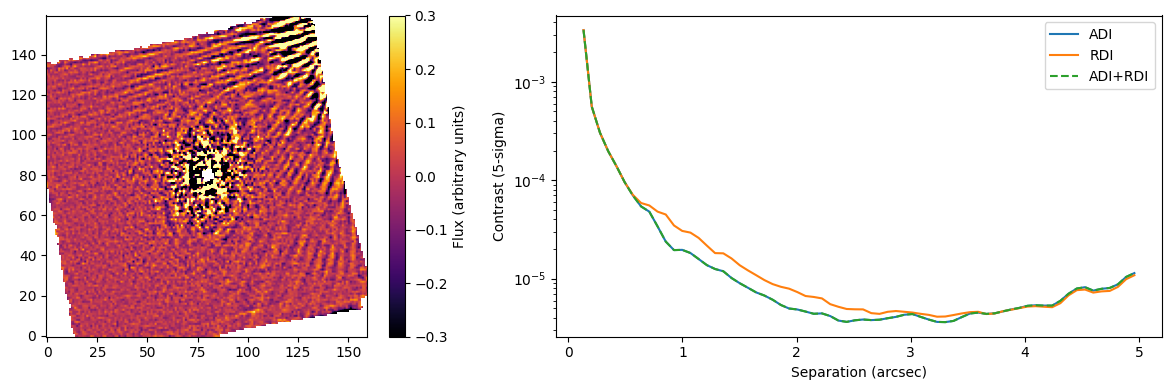

In [14]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1.4, 2]})
##
# # KLIP Data 
# cmap = plt.get_cmap(cmr.guppy')   # MPL
# cmap = plt.get_cmap('cmr.viola')   # MPL
# cmap = plt.get_cmap('cmr.wildfire')   # MPL
cmap='inferno'
im0 = axes[0].imshow(klip_image, origin="lower",vmin=-0.3,vmax=0.3,cmap=cmap)
plt.colorbar(im0, ax=axes[0], label="Flux (arbitrary units)")


for key in best_dict.keys():
    seps = np.load(directory+best_dict[key]["seps_filename"])
    cons = np.load(directory+best_dict[key]["cons_filename"])
    axes[1].semilogy(seps[kl_index], cons[kl_index], label=key,linestyle=best_dict[key]["linestyle"])

axes[1].legend()
axes[1].set_xlabel("Separation (arcsec)")
axes[1].set_ylabel("Contrast (5-sigma)")

plt.tight_layout()
plt.show()


In [8]:
from species import SpeciesInit
from species.data.database import Database
from species.read.read_isochrone import ReadIsochrone

SpeciesInit()
database = Database()
database.add_isochrones(model='atmo')
read_iso = ReadIsochrone(tag='atmo-ceq')

/home/maxmb/anaconda3/envs/spaceklip/lib/python3.11/site-packages/species/analysis/fit_evolution.py:18: UserWarning: PyMultiNest could not be imported. Perhaps because MultiNest was not build and/or found at the LD_LIBRARY_PATH (Linux) or DYLD_LIBRARY_PATH (Mac)?
  warnings.warn(
/home/maxmb/anaconda3/envs/spaceklip/lib/python3.11/site-packages/species/analysis/fit_model.py:27: UserWarning: PyMultiNest could not be imported. Perhaps because MultiNest was not build and/or found at the LD_LIBRARY_PATH (Linux) or DYLD_LIBRARY_PATH (Mac)?
  warnings.warn(
/home/maxmb/anaconda3/envs/spaceklip/lib/python3.11/site-packages/species/analysis/retrieval.py:24: UserWarning: PyMultiNest could not be imported. Perhaps because MultiNest was not build and/or found at the LD_LIBRARY_PATH (Linux) or DYLD_LIBRARY_PATH (Mac)?
  warnings.warn(


species v0.7.4
Working folder: /home/maxmb/Library/jwst_ers_NIRCAM_HD141569A/Planet_Sensitivity
 -> A new version (0.8.0) is available!
 -> It is recommended to update to the latest version
 -> See https://github.com/tomasstolker/species for details
Configuration settings:
   - Database: /home/maxmb/Library/jwst_ers_NIRCAM_HD141569A/Planet_Sensitivity/species_database.hdf5
   - Data folder: /home/maxmb/Library/jwst_ers_NIRCAM_HD141569A/Planet_Sensitivity/data
   - Interpolation method: linear
   - Magnitude of Vega: 0.03
Unpacking ATMO isochrones (9.6 MB)... [DONE]
Adding isochrones: ATMO equilibrium chemistry... [DONE]
Database tag: atmo-ceq
Adding isochrones: ATMO non-equilibrium chemistry (weak)... [DONE]
Database tag: atmo-neq-weak
Adding isochrones: ATMO non-equilibrium chemistry (strong)... [DONE]
Database tag: atmo-neq-strong


# Now do it for masses

## Centering and pixel scale and flux unit conversion

In [9]:
conversion_factor_f360m = f360m_roll1_header1["PHOTUJA2"]/f360m_roll1_header1["PHOTMJSR"]
klip_image *= conversion_factor_f360m

data_shape = klip_image.shape
pixel_scale_f300m = np.sqrt(f360m_roll1_header1['PIXAR_A2'])

#Coronagraphic center: 
coron_center = [80,80] #See the KLIP Header

#F300M - pixel sizes and plotting range. 
x_size_f300m = klip_image.shape[1]
y_size_f300m = klip_image.shape[0]
x_f300m = np.arange(x_size_f300m)
y_f300m = np.arange(y_size_f300m)
x_f300m = (x_f300m-coron_center[1])*pixel_scale_f300m
y_f300m = (y_f300m-coron_center[0])*pixel_scale_f300m
xx_f300m,yy_f300m = np.meshgrid(x_f300m,y_f300m)

In [10]:
from spaceKLIP.starphot import get_stellar_magnitudes
rawcon_dir = "/home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/rawcon/"
ccinfo = os.path.join(rawcon_dir, 'contrast_curve_info.txt')
with open(ccinfo) as cci:
    starfile, spectral_type = cci.readline().strip('\n').split(' /// ')
    starfile = os.path.join(rawcon_dir, starfile.replace('#',''))
mstar, fzero = get_stellar_magnitudes(starfile,
                                        'A2V',
                                        'NIRCAM',
                                        )
mstar_f360m = mstar['F360M']

/home/maxmb/anaconda3/envs/spaceklip/lib/python3.11/site-packages/fontTools/misc/py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(
**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-062 CANNOT BE CHECKED AGAINST ONLINE VERSION


The 'JWST/NIRCam.F360M' filter is not found in the list of available filters from the isochrone data of 'atmo-ceq'.
It will be tried to download the filter profile (if needed) and to use the associated atmospheric model spectra for calculating synthetic photometry.
The 'JWST/NIRCam.F360M' filter is not found in the list of available filters from the isochrone data of 'atmo-ceq'.
It will be tried to download the filter profile (if needed) and to use the associated atmospheric model spectra for calculating synthetic photometry.
The 'JWST/NIRCam.F360M' filter is not found in the list of available filters from the isochrone data of 'atmo-ceq'.
It will be tried to download the filter profile (if needed) and to use the associated atmospheric model spectra for calculating synthetic photometry.


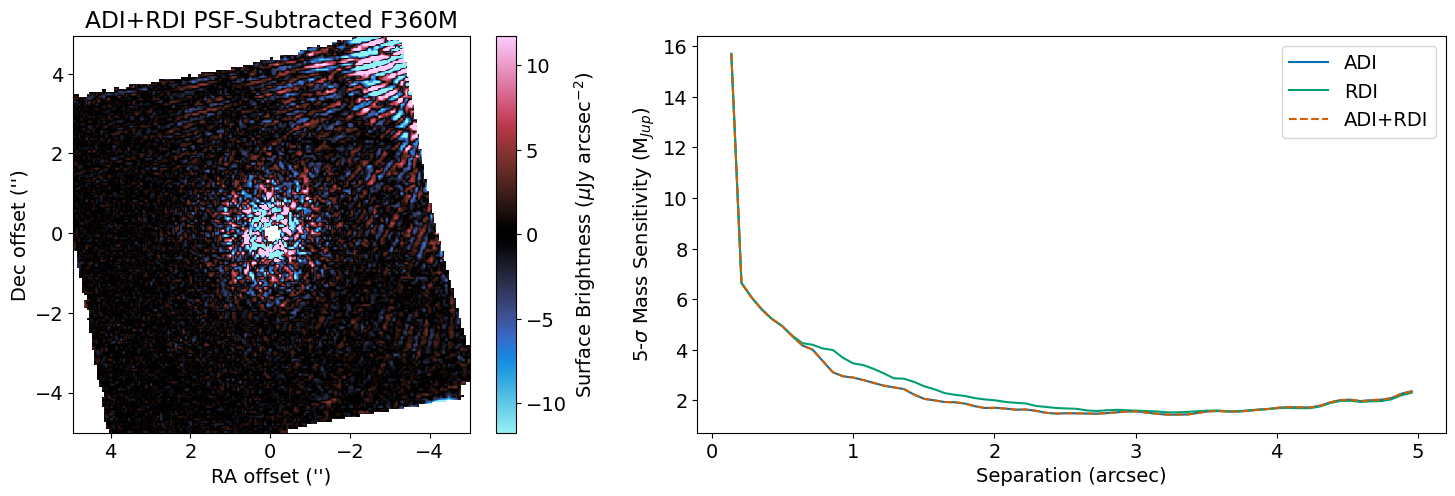

In [140]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1.4, 2]})


# Load the style sheet
style = plt.style.library['seaborn-v0_8-colorblind']  # Change to the desired style sheet name
# Get the color cycler from the style sheet
color_cycler = style['axes.prop_cycle']
axes[0].set_prop_cycle(color_cycler)
axes[1].set_prop_cycle(color_cycler)


cmap = plt.get_cmap('cmr.redshift')   # MPL
# cmap = plt.get_cmap('cmr.viola')   # Don't love
# cmap = plt.get_cmap('cmr.wildfire')   # Nope this one has weird neon green
# cmap='inferno'
im0 = axes[0].imshow(klip_image, origin="lower",vmin=-0.5*conversion_factor_f360m,vmax=0.5*conversion_factor_f360m,cmap=cmap,
                     extent=[x_f300m[-1],x_f300m[0],y_f300m[0],y_f300m[-1]])
plt.colorbar(im0, ax=axes[0], label="Surface Brightness ($\mu$Jy arcsec$^{-2}$)")

axes[0].set_title("ADI+RDI PSF-Subtracted F360M")
axes[0].set_xlabel("RA offset ('')")
axes[0].set_ylabel("Dec offset ('')")


### Contrast Curve now
for key in best_dict.keys():
    seps = np.load(directory+best_dict[key]["seps_filename"])
    cons = np.load(directory+best_dict[key]["cons_filename"])
    masses = read_iso.contrast_to_mass(age=5.,
                                distance=111.,
                                filter_name='JWST/NIRCam.F360M',
                                star_mag=mstar_f360m,
                                contrast=cons[kl_index],
                                use_mag=False)
    axes[1].plot(seps[kl_index], masses, label=key,linestyle=best_dict[key]["linestyle"])

axes[1].legend()
axes[1].set_xlabel("Separation (arcsec)")
axes[1].set_ylabel("5-$\sigma$ Mass Sensitivity (M$_{Jup}$)")

plt.tight_layout()

plt.savefig("klip_contrast_curve.png",dpi=300)
plt.show()



In [27]:
from spaceKLIP.psf import get_offsetpsf
from spaceKLIP.starphot import get_stellar_magnitudes
import spaceKLIP
import glob

# If we want to get the contrast back to physical units, we'll undo what analysis did before passing it into the measure_contrast function
idir = '/home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/'
odir = idir+'spaceklip/'
klip_dir = 'klipsub_final_240221'

fitsfiles = sorted(glob.glob(os.path.join(odir, klip_dir,"*KLmodes-all.fits")))

Database = spaceKLIP.database.Database(output_dir=odir)
Database.read_jwst_s3_data(fitsfiles)

key = [k for k in Database.red.keys()][0]

# Compute the pixel area in steradian.
pxsc_arcsec = Database.red[key]['PIXSCALE'][0] # arcsec
pxsc_rad = pxsc_arcsec / 3600. / 180. * np.pi  # rad
pxar = pxsc_rad**2  # sr

# Get stellar magnitudes and filter zero points.
starfile='hd_141569.vot'
spectral_type='A2V'
mstar, fzero = get_stellar_magnitudes(starfile, spectral_type, Database.red[key]['INSTRUME'][0], output_dir="./")  # vegamag, Jy


# Convert the host star brightness from vegamag to MJy. Use an
# unocculted model PSF whose integrated flux is normalized to
# one in order to obtain the theoretical peak count of the
# star.
filt = Database.red[key]['FILTER'][0]
offsetpsf = get_offsetpsf(Database.obs[key])
fstar = fzero[filt] / 10.**(mstar[filt] / 2.5) / 1e6 * np.max(offsetpsf)  # MJy

[spaceKLIP.database:INFO] --> Identified 1 concatenation(s)
[spaceKLIP.database:INFO]   --> Concatenation 1: JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R


 TYPE   EXP_TYPE DATAMODL TELESCOP ... SUBSECTS  KLMODES  BUNIT  BLURFWHM
------ --------- -------- -------- ... -------- --------- ------ --------
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        4 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        6 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        4 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        6 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        4 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        6 1,5,10,20 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,5,10,20 MJy/sr      nan
   ...       ...      ...      ... ...      ...       ...    ...      ...
PYKLIP NRC_CORON   STAGE3     JWST ...

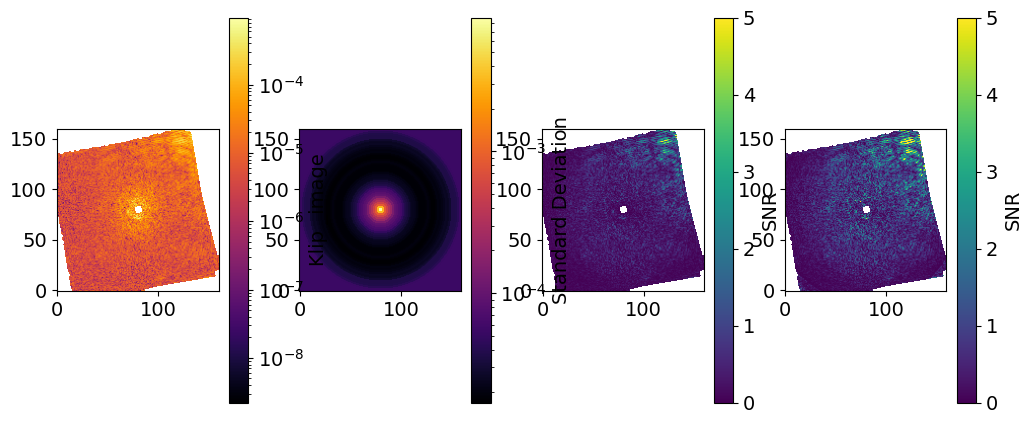

In [137]:
from matplotlib.colors import LogNorm

y,x = np.indices(klip_image.shape)
radds = np.sqrt((x-80)**2 + (y-80)**2)*pixel_scale_f300m

# plt.figure()
# plt.imshow(radds)
# plt.colorbar()

binsize = 2 #2 pixels

raddists = np.arange(0, klip_image.shape[1]/np.sqrt(2), binsize)*pixel_scale_f300m #Lists of radial distances

from copy import deepcopy
klip_image_SNR = deepcopy(klip_image) * pxar / fstar
std_image = np.zeros(klip_image.shape)
stds = []
new_std_image = np.zeros(klip_image.shape)
new_stds = []
# radiis = []
means = []
for radius in raddists: 
    # print(radius)
    annulus = (radds >= radius) & (radds < radius+binsize*pixel_scale_f300m)
    std = np.interp((radius+binsize*pixel_scale_f300m/2), seps[kl_index], cons[kl_index])*conversion_factor_f360m/5 #Divide by 5 to get 1-sigma
    std_image[annulus] = std
    stds.append(std)
    new_stds.append(np.nanstd(klip_image_SNR[annulus]))
    new_std_image[annulus] = np.nanstd(klip_image_SNR[annulus])
    # if annulus.shape[0] > 0
    # print(radius+binsize*pixel_scale_f300m)
    # plt.figure()
    # plt.imshow(annulus)
    
    #     
    #     stds.append(std)
    #     radds.append(radius+binsize*pixel_scale_f300m/2)
    # means.append(np.nanmean(klip_image_SNR[annulus]))
    # klip_image_SNR[annulus] = np.abs(klip_image[annulus])/5/std


fig,axes = plt.subplots(1,4,figsize=(12,5))

im0 = axes[0].imshow(np.abs(klip_image_SNR), cmap='inferno',norm=LogNorm(),origin='lower')
plt.colorbar(im0,ax=axes[0],label="Klip _image")


im1 = axes[1].imshow(std_image, cmap='inferno',norm=LogNorm(),origin='lower')
plt.colorbar(im1,ax=axes[1],label="Standard Deviation")


im2 = axes[2].imshow(np.abs(klip_image_SNR)/std_image, cmap='viridis',origin='lower',vmax=5,vmin=0)
# im2 = axes[2].imshow(klip_image_SNR/std_image, cmap='RdBu',origin='lower',vmax=1,vmin=-1)
plt.colorbar(im2,ax=axes[2],label="SNR")

im3 = axes[3].imshow(np.abs(klip_image_SNR)/new_std_image, cmap='viridis',origin='lower',vmax=5,vmin=0)
# im3 = axes[3].imshow(klip_image_SNR/new_std_image, cmap='RdBu_r',origin='lower',vmax=-5,vmin=5)
plt.colorbar(im3,ax=axes[3],label="SNR")

# plt.semilogy(radds,stds)
# plt.plot(seps[kl_index], cons[kl_index])
# plt.plot(radds,means)
# plt.figure()
# plt.imshow(klip_image_SNR, vmin=0, cmap='inferno')
# plt.colorbar()

# plt.figure()
# plt.imshow(klip_image_SNR, vmin=0, cmap='inferno')
# plt.colorbar()

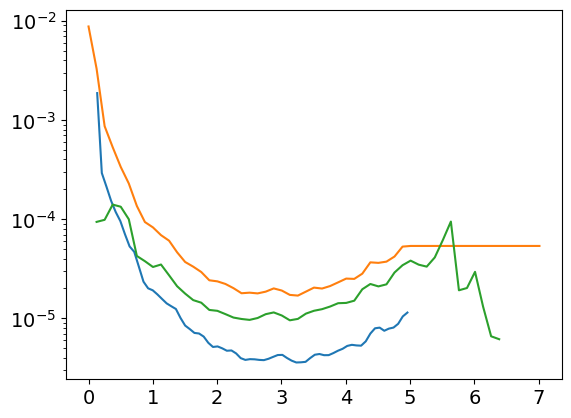

In [132]:
plt.semilogy(seps[kl_index], cons[kl_index])
plt.plot(raddists,stds)
plt.plot(raddists,new_stds)

The 'JWST/NIRCam.F360M' filter is not found in the list of available filters from the isochrone data of 'atmo-ceq'.
It will be tried to download the filter profile (if needed) and to use the associated atmospheric model spectra for calculating synthetic photometry.
The 'JWST/NIRCam.F360M' filter is not found in the list of available filters from the isochrone data of 'atmo-ceq'.
It will be tried to download the filter profile (if needed) and to use the associated atmospheric model spectra for calculating synthetic photometry.
The 'JWST/NIRCam.F360M' filter is not found in the list of available filters from the isochrone data of 'atmo-ceq'.
It will be tried to download the filter profile (if needed) and to use the associated atmospheric model spectra for calculating synthetic photometry.


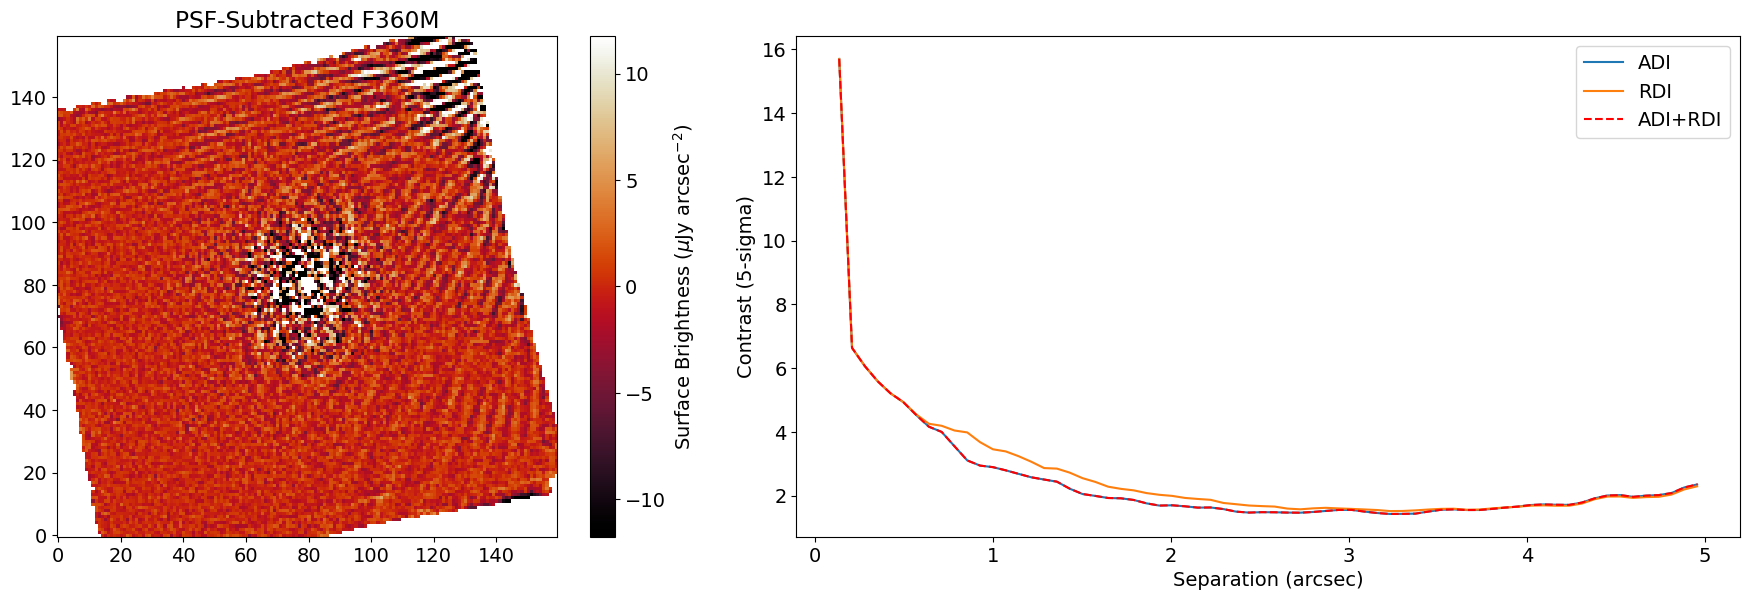

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [1.4, 2]})
##
# # KLIP Data 
cmap = plt.get_cmap('cmr.sunburst')   # MPL
# cmap = plt.get_cmap('cmr.viola')   # Don't love
# cmap = plt.get_cmap('cmr.wildfire')   # Nope this one has weird neon green
# cmap='inferno'
im0 = axes[0].imshow(klip_image, origin="lower",vmin=-0.5*conversion_factor_f360m,vmax=0.5*conversion_factor_f360m,cmap=cmap)
plt.colorbar(im0, ax=axes[0], label="Surface Brightness ($\mu$Jy arcsec$^{-2}$)")

axes[0].set_title("PSF-Subtracted F360M")

colors = ['C0','C1','r']

### Contrast Curve now
for i,key in enumerate(best_dict.keys()):
    seps = np.load(directory+best_dict[key]["seps_filename"])
    cons = np.load(directory+best_dict[key]["cons_filename"])
    masses = read_iso.contrast_to_mass(age=5.,
                                distance=111.,
                                filter_name='JWST/NIRCam.F360M',
                                star_mag=mstar_f360m,
                                contrast=cons[kl_index],
                                use_mag=False)
    axes[1].plot(seps[kl_index], masses, label=key,linestyle=best_dict[key]["linestyle"],color=colors[i])

axes[1].legend()
axes[1].set_xlabel("Separation (arcsec)")
axes[1].set_ylabel("Contrast (5-sigma)")

plt.tight_layout()
plt.show()


In [ ]:
y,x = np.indices(klip_image.shape)
radds = np.sqrt((x-80)**2 + (y-80)**2)*pixel_scale_f300m

In [ ]:
klip_header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  160                                                  
NAXIS2  =                  160                                                  
NAXIS3  =                    4                                                  
EXTEND  =                    T                                                  
DRPNFILE=                    2 / Num raw files used in pyKLIP                   
FILE_0  = 'jw01386117001_03107_00001_nrcalong_calints_mstar_subtracted_disk_su&'
CONTINUE  'btracted.fits_INT1.fits'                                             
FILE_1  = 'jw01386118001_03107_00001_nrcalong_calints_mstar_subtracted_disk_su&'
CONTINUE  'btracted.fits_INT1.fits'                                             
PSFSUB  = 'pyKLIP  '        

In [ ]:
cons

NameError: name 'cons' is not defined